In [1]:
# Author: Brent Artuch
# Date: 2024-09-27

import numpy as np
import sympy as sp
from sympy.physics.quantum import *
from IPython.display import *
from qiskit.visualization import plot_bloch_vector
from qiskit.quantum_info import Operator, Statevector
from qiskit import QuantumCircuit, QuantumRegister

sp.init_printing()

## Measurement in the Z-Basis
<u>2.7</u> - Say you measure the qubit and get $\ket{0}$. If you measure the qubit a second time, what is the probability of getting $\ket{0}$ and $\ket{1}$?<br>
Answer: The probability of measuring $\ket{0}$ is equal to 1 because measurement caused the state to collapse to the 0 state. Therefore, the probability of measureing $\ket{1}$ is now 0.

## Normalization
<u>2.8</u> A Qubit is in the state $$\frac{e^{i\pi/8}}{\sqrt{5}}\ket{0}+\beta\ket{1}$$ What is the value of $\beta$?<br>
Answer: We need to solve for $\beta$ ST $\beta$ = $\sqrt{1 - |\frac{e^{i\pi/8}}{\sqrt{5}}|^2}$

In [2]:
# solve for norm sqaured alpha
alpha_squared = 1/5
beta = round(sp.sqrt(1 - alpha_squared), 2)
beta # 2/sqrt(5)

<u>2.9</u> - A qubit is in the state: $$A(2e^{i\pi/6}\ket{0}-3\ket{1})$$
a) Normalize the state b) find the probability of measuring $\ket{0}$ and $\ket{1}$<br>
Answer: to normalize this state, we need to solve for $A$ ST the amplitudes of the state have a total probability equal to 1:
\begin{align*}
1&=|2e^{i\pi/6}A|^2+|-3A|^2c\\
1&=4|A|^2+9|A^2|\\
1&=13|A|^2\\
|A|^2 & = \frac{1}{13}\\
A&= \frac{1}{\sqrt{13}}
\end{align*}

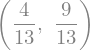

In [3]:
# Now we can find the probabilities
alpha = 1/sp.sqrt(13) * 2
beta = 1/sp.sqrt(13) * -3
prob_ket_0 = alpha * sp.conjugate(alpha)
prob_ket_1 = beta * sp.conjugate(beta)
(prob_ket_0, prob_ket_1)

## Measurement in Other Bases
<u>2.10</u> - A qubit is in the state:
$$
\frac{1}{2}\ket{0}-\frac{\sqrt{3}}{2}\ket{1}
$$
a) If you measure in the Z-basis $\{\ket{0}, \ket{1}\}$, what states can you get with what probabilities?<br>
Answer: We get $\ket{0}$ with probability $\frac{1}{4}$ and $\ket{1}$ with probability $\frac{3}{4}$<br>
<br>
b) Write the qubit states in terms of $\ket{+}$ and $\ket{-}$.<br>
Answer: 
\begin{align*}
\frac{1}{2}\ket{0}-\frac{\sqrt{3}}{2}\ket{1} &= \frac{1}{2}\frac{1}{\sqrt{2}}(\ket{+}+\ket{-})-\frac{\sqrt{3}}{2}\frac{1}{\sqrt{2}}(\ket{+}-\ket{-}) \\
&= \frac{1}{2\sqrt{2}}(\ket{+}+\ket{-})-\frac{\sqrt{3}}{2\sqrt{2}}(\ket{+}-\ket{-}) \\
&= \frac{1}{2\sqrt{2}}\ket{+}+\frac{1}{2\sqrt{2}}\ket{-}-\frac{\sqrt{3}}{2\sqrt{2}}\ket{+}+\frac{\sqrt{3}}{2\sqrt{2}}\ket{-} \\
&= \frac{1-\sqrt{3}}{2\sqrt{2}}\ket{+}+\frac{1+\sqrt{3}}{2\sqrt{2}}\ket{-}
\end{align*}

In [4]:
# Probabilities
alpha = (1-np.sqrt(3)) / (2*np.sqrt(2))
beta = (1+np.sqrt(3)) / (2*np.sqrt(2))
prob_ket_plus = round(alpha * np.conjugate(alpha), 2)
prob_ket_minus = round(beta * np.conjugate(beta), 2)
(prob_ket_plus, prob_ket_minus)

c) If you measure in the basis $\{\ket{+}, \ket{-}\}$, what states can you get with what probabilities?<br>
Answer: We get $\ket{+}$ with probability $0.07$ and $\ket{-}$ with probability $0.93$

<u>2.11</u> - The following two states are opposite points on the Bloch sphere:
\begin{align*}
\ket{a} &= \frac{\sqrt{3}}{2}\ket{0}+\frac{i}{2}\ket{1}\\
\ket{b} &= \frac{i}{2}\ket{0}+\frac{\sqrt{3}}{2}\ket{1}
\end{align*}
Now consider a qubit state:<br>
$$
\frac{1}{2}\ket{0}-\frac{\sqrt{3}}{2}\ket{1}
$$
a) Write the qubit's state in terms pf $\ket{a}$ and $\ket{b}$.<br>
Answer: First express $\ket{0}$ and $\ket{1}$ in terms of $\ket{a}$ and $\ket{b}$:<br>
$$
\ket{0}=\frac{\sqrt{3}}{2}\ket{a}-\frac{i}{2}\ket{b}, \ \ \ \ \  \ket{1}=-\frac{i}{2}\ket{a}+\frac{\sqrt{3}}{2}\ket{b}
$$
Then plug the new values for $\ket{0}$ and $\ket{1}$ into the state equation:<br>
\begin{align*}
\frac{1}{2}\ket{0}-\frac{\sqrt{3}}{2}\ket{1}&=\frac{1}{2}(\frac{\sqrt{3}}{2}\ket{a}-\frac{i}{2}\ket{b})-\frac{\sqrt{3}}{2}(-\frac{i}{2}\ket{a}+\frac{\sqrt{3}}{2}\ket{b})\\
&= \frac{\sqrt{3}}{4}\ket{a}-\frac{i}{4}\ket{b}+\frac{i\sqrt{3}}{4}\ket{a}-\frac{3}{4}\ket{b}\\
&= \frac{\sqrt{3}(1+i)}{4}\ket{a}-\frac{i-3}{4}\ket{b}
\end{align*}

In [5]:
alpha = (sp.sqrt(3)*(1+sp.I))/4
beta = -((sp.I-3)/4)
prob_ket_a = round(alpha * sp.conjugate(alpha), 2)
prob_ket_b = round(beta * sp.conjugate(beta), 2)
(prob_ket_a, prob_ket_b)

b) If you measure in the basis $\{\ket{a}, \ket{b}\}$, what states can you get with what probabilities?<br>
Answer: We get $\ket{a}$ with probability $0.38$ and $\ket{b}$ with probability $0.62$

## Spherical Coordinates
<u>2.14</u> - A qubit is in the state: <br>
$$
\ket{i}=\frac{1}{\sqrt{2}}(\ket{0}+i\ket{1})
$$
a) Where on the Bloch sphere is this state? (and plot it)<br>
Answer: First find the polar form of the beta coefficient.<br>
$$
z = r(\cos\varphi + i \sin\varphi) =re^{i\varphi}
$$ 
\begin{align*}
&\frac{1}{\sqrt{2}}\ket{0}+\frac{i}{\sqrt{2}}\ket{1}\\
r_\beta &= \sqrt{a^2+b^2}\\
&= \sqrt{0^2+\left(\frac{1}{\sqrt{2}}\right)^2}\\
&= \frac{1}{\sqrt{2}}
\end{align*}
Note: since $\alpha$ has no imaginary component, $r_\alpha$ = $\sqrt{a^2}$ = $\frac{1}{\sqrt{2}}$ = $r_\beta$<br>
We can now solve for $\varphi$ using $b=r\sin\varphi$<br>
Using the $b$ component from $\beta$, we get:<br>
\begin{align*}
\frac{1}{\sqrt{2}}&=\frac{1}{\sqrt{2}}\sin{\varphi} \\
1 &= cos(\varphi)\\
\varphi&=sin^{-1}(1)\\
\varphi&=\frac{\pi}{2}
\end{align*}

3D Coordinates:


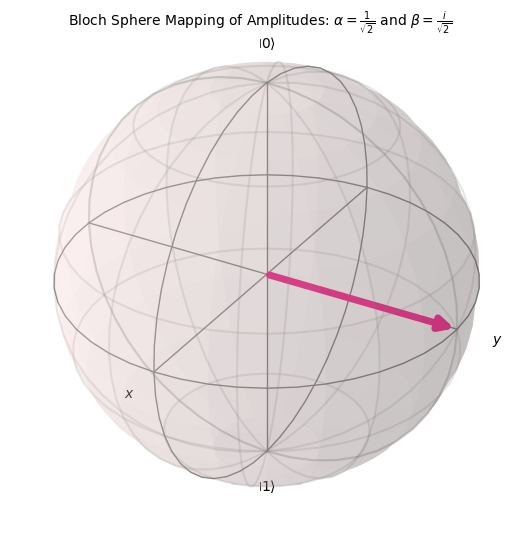

In [6]:
# Function to extract spherical coordinates from a given state
alpha = 1/np.sqrt(2)
beta = sp.I/np.sqrt(2)
q = [complex(alpha), complex(beta)]
# ST alpha and beta are amplitudes of ket 0 and ket 1 respectivley

# Convert to polar form:
r_0 = np.abs(q[0])
phi_0 = np.angle(q[0])
r_1 = np.abs(q[1])
phi_1 = np.angle(q[1])

# Calculate the coordinates:
r = np.sqrt(r_0 ** 2 + r_1 ** 2)
theta = 2 * np.acos(alpha)
phi = phi_1 - phi_0

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

print("3D Coordinates:")
display(x,y,z)
plot_bloch_vector([x,y,z], title=r'Bloch Sphere Mapping of Amplitudes: $\alpha=\frac{1}{\sqrt{2}}$ and $\beta=\frac{i}{\sqrt{2}}$')

<u>2.15</u> - A qubit is in the state: <br>
$$
\frac{1-i}{2\sqrt{2}}\ket{0}+\frac{\sqrt{3}}{2}\ket{1}
$$
a) Where on the Bloch sphere is this state? (and plot it)<br>
Answer: Convert $\alpha$ to polar form:<br>
\begin{align*}
z_\alpha&=a+bi
=\frac{1}{2\sqrt{2}}-\frac{i}{2\sqrt{2}}
=\frac{1}{2\sqrt{2}}-i\frac{1}{2\sqrt{2}}\\
r_\alpha&=\sqrt{a_\alpha^2+b_\alpha^2}
=\sqrt{\left(\frac{1}{2\sqrt{2}}\right)^2+\left(\frac{1}{2\sqrt{2}}\right)^2}
=\sqrt{\frac{1}{8}+\frac{1}{8}}
=\frac{1}{2}\\
a_\alpha&=r\sin\varphi_\alpha
\end{align*}
Now solve for $\varphi$:<br>
\begin{align*}
\frac{1}{2\sqrt{2}}&=\frac{1}{2}\sin\varphi_\alpha\\
\frac{1}{\sqrt{2}}&=\sin\varphi_\alpha\\
\varphi_\alpha&=\sin^{-1}\left(\frac{1}{\sqrt{2}}\right)=\frac{\pi}{4}
\end{align*}

3D Coordinates:


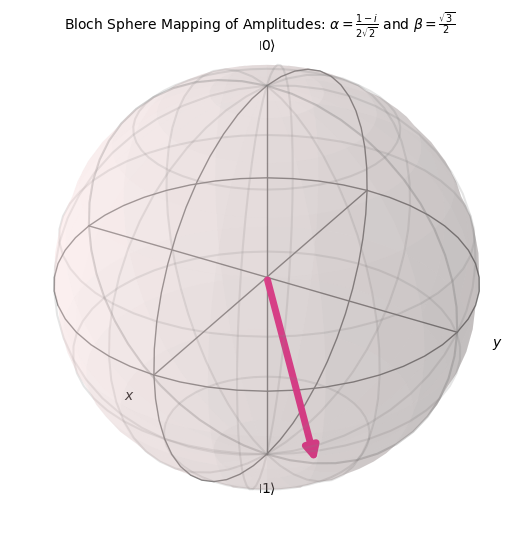

In [7]:
# Function to extract spherical coordinates from a given state
alpha = (1-sp.I)/2*np.sqrt(2)
beta = np.sqrt(3)/2
q = [complex(alpha), complex(beta)]
# ST alpha and beta are amplitudes of ket 0 and ket 1 respectivley

# Convert to polar form:
r_0 = np.abs(q[0])
phi_0 = np.angle(q[0])
r_1 = np.abs(q[1])
phi_1 = np.angle(q[1])

# Calculate the coordinates:
r = np.sqrt(r_0 ** 2 + r_1 ** 2)
theta = 2 * np.asin(beta)
phi = phi_1 - phi_0

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

print("3D Coordinates:")
display(x,y,z)
plot_bloch_vector([x,y,z], title=r'Bloch Sphere Mapping of Amplitudes: $\alpha=\frac{1-i}{2\sqrt{2}}$ and $\beta=\frac{\sqrt{3}}{2}$')

<u>2.16</u> - Consider the states $\ket{a}$ and $\ket{b}$ from exerscise 2.11. Show that these two states are at opposit points on the Bloch Sphere ST<br>
&emsp;&emsp;&emsp;&emsp; $\theta_b=\pi-\theta_a$ and $\phi_b=\phi_a+\pi$<br>
Answer: First, find $r$ for both states:<br>
\begin{align*}
r_\ket{a}\alpha&=\sqrt{a^2}=a=\frac{\sqrt{3}}{2}\\
r_\ket{b}\alpha&=\sqrt{a^2+b^2}=\sqrt{0+b^2}=\sqrt{b^2}=b=\frac{1}{2}
\end{align*}
Now solve for the $\varphi$ values:<br>
\begin{align*}
a_\ket{a}\alpha&=r\sin\varphi_\ket{a}\alpha  &  a_\ket{b}\alpha&=r\sin\varphi_\ket{b}\alpha\\
\frac{\sqrt{3}}{2}&=\frac{\sqrt{3}}{2}\sin\varphi_\ket{a}\alpha & \frac{1}{2}&=\frac{1}{2}\sin\varphi_\ket{b}\alpha\\
\varphi_\ket{a}\alpha&=\frac{\pi}{2} & \varphi_\ket{b}\alpha&=\frac{\pi}{2}
\end{align*}
Before moving on, we need to address a sign change for $\varphi_\ket{b}$ since the imagenary part needs to be in the second position as described by the equation:<br>

\begin{align*}
\ket{\psi}&=\cos\left(\frac{\theta}{2}\right)\ket{0}+e^{i\phi}\sin\left(\frac{\theta}{2}\right)\ket{1}\\
\ket{b}&=\frac{i}{2}\ket{0}+\frac{\sqrt{3}}{2}\ket{1}\\
&=\frac{1}{2}e^{i\pi/2}\ket{0}+\frac{\sqrt{3}}{2}\ket{1}\\
&=\frac{1}{2}e^{i\pi/2}\ket{0}+\frac{\sqrt{3}}{2}\ket{1}\ \text{Factor}\\
&=\frac{1}{2}\ket{0}+e^{-i\pi/2}\frac{\sqrt{3}}{2}\ket{1}\ \text{Recall:}\ e^{2\pi i}=1\\
&=\frac{1}{2}\ket{0}+e^{2\pi i}e^{-i\pi/2}\frac{\sqrt{3}}{2}\ket{1}\\
&=\frac{1}{2}\ket{0}+e^{3\pi/2}\frac{\sqrt{3}}{2}\ket{1}\\
&=\cos\left(\frac{2\pi/3}{2}\right)\ket{0}+e^{i3\pi/2}\sin\left(\frac{2\pi/3}{2}\right)\ket{1}\\
\end{align*}
And thus:
$$
\varphi_\ket{b} = \frac{3\pi}{2} = 2\pi-\frac{\pi}{2}
$$

In [8]:
alpha_a = np.sqrt(3) / 2
beta_a = 1/2

theta_ket_a = 2*np.acos(alpha_a) # pi/3
phi_ket_a = np.pi/2
theta_ket_b = 2*np.acos(beta_a) # 2pi/3
phi_ket_b = 3*np.pi/2 # -pi/2

theta_b_is_pi_minus_theta_a = round(theta_ket_b, 2) == round(np.pi - theta_ket_a, 2)
phi_b_is_phi_a_plus_pi = round(phi_ket_b, 2) == round(phi_ket_a + np.pi, 2)

theta_b_is_pi_minus_theta_a, phi_b_is_phi_a_plus_pi

(np.True_, True)

## Linear Maps
<u>2.22</u> - Consider a map $U$ that transforms the Z-basis states as follows:<br>
\begin{align*}
U\ket{0}=\ket{0}+\ket{1}\\
U\ket{1}=\ket{0}-\ket{1}
\end{align*}
Say $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$ is a normalized quantum state ST $|\alpha|^2+|\beta|^2=1$.<br>
a) Calculate $U\ket{\psi}$. Is it a valid quantum state?
\begin{align*}
U(\alpha\ket{0}+\beta\ket{1})&=\alpha U\ket{0}+\beta U\ket{1}\\
&=\alpha(\ket{0}+\ket{1})+\beta(\ket{0}-\ket{1})\\
&=\alpha\ket{0}+\alpha\ket{1}+\beta\ket{0}-\beta\ket{1}\\
&=(\alpha+\beta)\ket{0}+(\alpha-\beta)\ket{1}
\end{align*}
Now we check if it is a valid state:<br>
\begin{align*}
|\alpha|^2+|\beta|^2&=|\alpha+\beta|^2+|\alpha-\beta|^2\\
&=(\alpha+\beta)(\alpha+\beta)^*+(\alpha-\beta)(\alpha-\beta)^*\\
&=|\alpha|^2+\alpha\beta^*+\alpha^*\beta+|\beta|^2+|\alpha|^2-\alpha\beta^*-\alpha^*\beta+|\beta|^2\\
&=|\alpha|^2+|\beta|^2+|\alpha|^2+|\beta|^2\\
&=2(|\alpha|^2+|\beta|^2)=2\not=1
\end{align*}
Thus, $U$ is not a valid quantum gate because it has a total probability not equal to 1.

In [9]:
# Calculate U |psi> with code
ket_zero, ket_one = sp.symbols("|0>, |1>")
alpha, beta = sp.symbols("alpha, beta")
U_ket_zero = ket_zero + ket_one
U_ket_one = ket_zero - ket_one
q = sp.expand(alpha*(U_ket_zero)+beta*(U_ket_one))
q = sp.collect(q, ket_zero)
q = sp.collect(q, ket_one)
display(Latex("$U\\ket{\\psi}$="))
q

<IPython.core.display.Latex object>

In [10]:
# Check that the state is valid 
eq = (alpha+beta)*sp.conjugate(alpha+beta) + (alpha-beta)*sp.conjugate(alpha-beta)
eq = sp.expand(eq) 
eq = sp.factor(eq)
display(Latex("$1\\not=$"))
eq # not valid because |alpha|^2 + |beta|^2 not 1 

<IPython.core.display.Latex object>

<u>2.23</u> - Consider a map $U$ that transforms the Z-basis states as follows:<br>
\begin{align*}
U\ket{0}=\frac{\sqrt{3}}{2}\ket{0}+\frac{\sqrt{3}+i}{4}\ket{1}\\
U\ket{1}=\frac{\sqrt{3}+i}{4}\ket{0}-\frac{\sqrt{3}+3i}{4}\ket{1}
\end{align*}
Say $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$ is a normalized quantum state ST $|\alpha|^2+|\beta|^2=1$.<br>
a) Calculate $U\ket{\psi}$. Is it a valid quantum state?
\begin{align*}
U(\alpha\ket{0}+\beta\ket{1})&=\alpha U\ket{0}+\beta U\ket{1}\\
&=\alpha\left(\frac{\sqrt{3}}{2}\ket{0}+\frac{\sqrt{3}+i}{4}\ket{1}\right)+\beta\left(\frac{\sqrt{3}+i}{4}\ket{0}-\frac{\sqrt{3}+3i}{4}\ket{1}\right)\\
&=\alpha\frac{\sqrt{3}}{2}\ket{0}+\alpha\frac{\sqrt{3}+i}{4}\ket{1}+\beta\frac{\sqrt{3}+i}{4}\ket{0}-\beta\frac{\sqrt{3}+3i}{4}\ket{1}\\
&=\left(\frac{\sqrt{3}}{2}\alpha+\frac{\sqrt{3}+i}{4}\beta\right)\ket{0}+\left(\frac{\sqrt{3}+i}{4}\alpha-\frac{\sqrt{3}+3i}{4}\beta\right)\ket{1}
\end{align*}
Now we check if it is a valid state:<br>
\begin{align*}
|\alpha|^2+|\beta|^2&=\left|\frac{\sqrt{3}}{2}\alpha+\frac{\sqrt{3}+i}{4}\beta\right|^2+\left|\frac{\sqrt{3}+i}{4}\alpha-\frac{\sqrt{3}+3i}{4}\beta\right|^2\\
&=\left(\frac{\sqrt{3}}{2}\alpha+\frac{\sqrt{3}+i}{4}\beta\right)\left(\frac{\sqrt{3}}{2}\alpha+\frac{\sqrt{3}+i}{4}\beta\right)^*+\left(\frac{\sqrt{3}+i}{4}\alpha-\frac{\sqrt{3}+3i}{4}\beta\right)\left(\frac{\sqrt{3}+i}{4}\alpha-\frac{\sqrt{3}+3i}{4}\beta\right)^*\\
&=\left(\frac{\sqrt{3}}{2}\alpha+\frac{\sqrt{3}+i}{4}\beta\right)\left(\frac{\sqrt{3}}{2}\alpha^*+\frac{\sqrt{3}-i}{4}\beta^*\right)+\left(\frac{\sqrt{3}+i}{4}\alpha-\frac{\sqrt{3}+3i}{4}\beta\right)\left(\frac{\sqrt{3}-i}{4}\alpha^*-\frac{\sqrt{3}-3i}{4}\beta^*\right)\\
&=|\alpha|^2\frac{3}{4}+\alpha\beta^*\frac{3-i\sqrt{3}}{8}+\alpha^*\beta\frac{3+i\sqrt{3}}{8}+|\beta|^2\frac{1}{4}+|\alpha|^2\frac{1}{4}-\alpha\beta^*\frac{3-i\sqrt{3}}{8}-\alpha^*\beta\frac{3+i\sqrt{3}}{8}+|\beta|^2\frac{3}{4}\\
&=|\alpha|^2\frac{3}{4}+|\beta|^2\frac{1}{4}+|\alpha|^2\frac{1}{4}+|\beta|^2\frac{3}{4}\\
&=|\alpha|^2+|\beta|^2=1
\end{align*}
Thus, $U$ is a valid quantum gate because it has a total probability equal to 1.

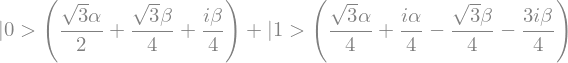

In [11]:
# Calculate U |psi> with code
ket_zero, ket_one = sp.symbols("|0>, |1>")
alpha, beta = sp.symbols("alpha, beta")
U_ket_zero = (sp.sqrt(3)/2)*ket_zero + ((sp.sqrt(3)+sp.I)/4)*ket_one
U_ket_one = ((sp.sqrt(3)+sp.I)/4)*ket_zero - ((sp.sqrt(3)+3*sp.I)/4)*ket_one
q = sp.expand(alpha*(U_ket_zero)+beta*(U_ket_one))
q = sp.collect(q, ket_zero)
q = sp.collect(q, ket_one)
q

In [12]:
# Check that the state is valid 
eq = (
                (((sp.sqrt(3)*alpha)/2)+((sp.sqrt(3)*beta)/4)+((sp.I*beta)/4))*
    sp.conjugate(((sp.sqrt(3)*alpha)/2)+((sp.sqrt(3)*beta)/4)+((sp.I*beta)/4)) 
                + 
                (((sp.sqrt(3)*alpha)/4)+((sp.I*alpha)/4)-((sp.sqrt(3)*beta)/4)-((3*sp.I*beta)/4))*
    sp.conjugate(((sp.sqrt(3)*alpha)/4)+((sp.I*alpha)/4)-((sp.sqrt(3)*beta)/4)-((3*sp.I*beta)/4))
)
eq = sp.expand(eq) 
eq = sp.factor(eq)
display(Latex("$1=$"))
eq # valid because |alpha|^2 + |beta|^2 is 1 

<IPython.core.display.Latex object>

## Common One Qubit Gates
<u>2.27</u> - Prove that:<br>
$XZXZ(\alpha\ket{0}+\beta\ket{1})=-(\alpha\ket{0}+\beta\ket{1})$<br>
Answer: Apply each gate to the state.<br> 
\begin{align*}
XZXZ(\alpha\ket{0}+\beta\ket{1})&=XZX(\alpha Z\ket{0}+\beta Z\ket{1})\\
&=XZX(\alpha \ket{0}-\beta \ket{1})\\
&=XZ(\alpha X\ket{0}-\beta X\ket{1})\\
&=XZ(\alpha \ket{1}-\beta \ket{0})\\
&=X(\alpha Z\ket{1}-\beta Z\ket{0})\\
&=X(-\alpha \ket{1}-\beta \ket{0})\\
&=(-\alpha X\ket{1}-\beta X\ket{0})\\
&=(-\alpha \ket{0}-\beta \ket{1})\\
&=-(\alpha \ket{0}+\beta \ket{1})_\square
\end{align*}

In [13]:
# Using code
# Define the qubit state
q = Statevector([1, 1])

# Define the gates 
X = Operator([[0, 1], [1, 0]])
Z = Operator([[1, 0], [0, -1]])

# Iterate over gates from right to left
gates = [Z, X, Z, X]
for gate in gates:
    q = q.evolve(gate)

display(q.draw("latex"))

<IPython.core.display.Latex object>

<u>2.28</u> - Consider the gate $R_z(\theta)$, which rotates about the z-axis by an angle $\theta$:<br>
\begin{align*}
R_z(\theta)\ket{0}&=\ket{0}\\
R_z(\theta)\ket{1}&=e^{i\theta}\ket{1}
\end{align*}
The $Z$, $S$, and $T$ gates are all specific instances of the $R_z$ gate, where $Z=R_z(\pi)$, $S=R_z(\pi/2)$, and $T=R_z(\pi/4)$. Say $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$ is a normalized quantum state ST $|\alpha|^2+|\beta|^2=1$.<br>
Calculate $R_z(\theta)\ket{\psi}$ and show that its total probability is 1.<br>
Answer: Apply $R_z(\theta)$ to $\ket{\psi}$.
\begin{align*}
R_z(\theta)\ket{\psi}&=\alpha R_z(\theta)\ket{0}+\beta R_z(\theta)\ket{1}\\
&=\alpha\ket{0}+\beta e^{i\theta}\ket{1}
\end{align*}
Show that $|\alpha|^2+|\beta|^2=1$.
\begin{align*}
|\alpha|^2+|\beta|^2&=|\alpha|^2+|\beta e^{i\theta}|^2 \\
&\text{The imagenary component will vanish during complex conjugation, thus}\\
&=|\alpha|^2+|\beta|^2=1
\end{align*}

In [14]:
# Calculate R_z(theta) |psi> with code
ket_zero, ket_one = sp.symbols("|0>, |1>")
alpha, beta, theta = sp.symbols("alpha, beta, theta")
Rz_theta_ket_zero = ket_zero
Rz_theta_ket_one = sp.exp(sp.I*theta)*ket_one
q = sp.expand(alpha*(Rz_theta_ket_zero)+beta*(Rz_theta_ket_one))
q = sp.collect(q, ket_zero)
q = sp.collect(q, ket_one)
display(Latex("$R_z(\\theta)\\ket{\\psi}$="))
q

<IPython.core.display.Latex object>

<u>2.29</u> - Say $\ket{\psi}=\alpha\ket{0}+\beta\ket{1}$ is a normalized quantum state ST $|\alpha|^2+|\beta|^2=1$.<br>
Calculate $H\ket{\psi}$ and show that its total probability is 1.<br>
Answer:.<br>
First define the Hadamard Gate:
\begin{align*}
H\ket{0}= \frac{1}{\sqrt{2}}(\ket{0}+\ket{1})=\ket{+}\\
H\ket{1}= \frac{1}{\sqrt{2}}(\ket{0}-\ket{1})=\ket{-}\\
\end{align*}
Now apply $H$ to $\ket{\psi}$
\begin{align*}
H\ket{\psi}&=\alpha H\ket{0}+\beta H\ket{1}\\
&= \frac{\alpha}{\sqrt{2}}(\ket{0}+\ket{1})+ \frac{\beta}{\sqrt{2}}(\ket{0}-\ket{1})\\
&= \frac{\alpha}{\sqrt{2}}\ket{0}+\frac{\alpha}{\sqrt{2}}\ket{1}+ \frac{\beta}{\sqrt{2}}\ket{0}-\frac{\beta}{\sqrt{2}}\ket{1}\\
&=\frac{\alpha+\beta}{\sqrt{2}}\ket{0}+\frac{\alpha-\beta}{\sqrt{2}}\ket{0}
\end{align*}
Show that $|\alpha|^2+|\beta|^2=1$.<br>
\begin{align*}
|\alpha|^2+|\beta|^2&=\left|\frac{\alpha+\beta}{\sqrt{2}}\right|^2+\left|\frac{\alpha-\beta}{\sqrt{2}}\right|^2\\
&=\frac{|\alpha|^2+2\alpha\beta+|\beta|^2}{2}+\frac{|\alpha|^2-2\alpha\beta+|\beta|^2}{2}\\
&=\frac{2|\alpha|^2+2|\beta|^2}{2}\\
&=|\alpha|^2+|\beta|^2=1
\end{align*}

<IPython.core.display.Latex object>

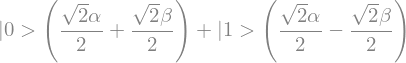

In [15]:
# Calculate H |psi> with code
ket_zero, ket_one = sp.symbols("|0>, |1>")
alpha, beta = sp.symbols("alpha, beta")
H_ket_zero = (1/sp.sqrt(2))*ket_zero + (1/sp.sqrt(2))*ket_one
H_ket_one = (1/sp.sqrt(2))*ket_zero - (1/sp.sqrt(2))*ket_one
q = sp.expand(alpha*(H_ket_zero)+beta*(H_ket_one))
q = sp.collect(q, ket_zero)
q = sp.collect(q, ket_one)
display(Latex("$H\\ket{\\psi}=$"))
q

In [16]:
# Check that the state is valid 
eq = (
                (((sp.sqrt(2)*alpha)/2)+((sp.sqrt(2)*beta)/2))*
    sp.conjugate(((sp.sqrt(2)*alpha)/2)+((sp.sqrt(2)*beta)/2)) 
                + 
                (((sp.sqrt(2)*alpha)/2)-((sp.sqrt(2)*beta)/2))*
    sp.conjugate(((sp.sqrt(2)*alpha)/2)-((sp.sqrt(2)*beta)/2))
)
eq = sp.expand(eq) 
display(Latex("$1=$"))
eq # valid because |alpha|^2 + |beta|^2 is 1 

<IPython.core.display.Latex object>

<u>2.30</u> - Show that $H\ket{-}=\ket{1}$.<br>
Answer:<br>
\begin{align*}
H\ket{-}&=H\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})\\
&=\frac{1}{\sqrt{2}}(H\ket{0}-H\ket{1})\\
&=\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})-\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})\right]\\
&=\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}\ket{0}+\frac{1}{\sqrt{2}}\ket{1}-\frac{1}{\sqrt{2}}\ket{0}+\frac{1}{\sqrt{2}}\ket{1})\right]\\
&=\frac{1}{2}\ket{0}+\frac{1}{2}\ket{1}-\frac{1}{2}\ket{0}+\frac{1}{2}\ket{1})\\
&=\ket{1}
\end{align*}

b) Show that $H\ket{-i}=\ket{i}$.<br>
Answer:<br>
\begin{align*}
H\ket{-i}&=H\frac{1}{\sqrt{2}}(\ket{0}-i\ket{1})\\
&=\frac{1}{\sqrt{2}}(H\ket{0}- i H \ket{1})\\
&=\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})-\frac{i}{\sqrt{2}}(\ket{0}-\ket{1})\right]\\
&=\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}\ket{0}+\frac{1}{\sqrt{2}}\ket{1}-\frac{i}{\sqrt{2}}\ket{0}+\frac{i}{\sqrt{2}}\ket{1}\right]\\
&=\frac{1}{\sqrt{2}}\left[\frac{1-i}{\sqrt{2}}\ket{0}+\frac{1+i}{\sqrt{2}}\ket{1}\right]\\
&=\frac{1}{\sqrt{2}}\left[e^{-i\pi/4}\ket{0}+e^{i\pi/4}\ket{1}\right]\\
&=e^{-i\pi/4}\frac{1}{\sqrt{2}}\left[\ket{0}+e^{i\pi/2}\ket{1}\right]\\
&=e^{-i\pi/4}\frac{1}{\sqrt{2}}\left[\ket{0}+i\ket{1}\right]\\
&=e^{-i\pi/4}\ket{i}\\
&\text{The global phase}\ e^{i\theta}\ \text{is dropped, thus}\\
&=\ket{i}
\end{align*}

In [17]:
ket_minus = Statevector([1/sp.sqrt(2),-1/sp.sqrt(2)])
H = Operator([[1 / sp.sqrt(2), 1 / sp.sqrt(2)], [1 / sp.sqrt(2), -1 / sp.sqrt(2)]])
q = ket_minus.evolve(H)
display(Latex("$H\\ket{-}=\\ket{1}$:"))
display(q.draw("latex"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [18]:
ket_minus_i = Statevector([1/sp.sqrt(2),-1.0j/sp.sqrt(2)])
H = Operator([[1 / sp.sqrt(2), 1 / sp.sqrt(2)], [1 / sp.sqrt(2), -1 / sp.sqrt(2)]])
q = ket_minus_i.evolve(H)
display(Latex("$H\\ket{-i}=\\ket{i}$:"))
display(q.draw("latex")) # This is the correct result before factoring the global phase as shown above.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<u>2.32</u> - Show that $HXH=Z$.<br>
Answer:<br>
We must show that $HXH\ket{0}$ and $Z{\ket{0}}$ result in the same state:<br>
\begin{align*}
HXH\ket{0}&=HX(H\ket{0})\\
&=HX(\frac{1}{\sqrt{2}}(\ket{0}+\ket{1}))\\
&=H(\frac{1}{\sqrt{2}}(X\ket{0}+X\ket{1}))\\
&=H(\frac{1}{\sqrt{2}}(\ket{1}+\ket{0}))\\
&=\frac{1}{\sqrt{2}}(H\ket{1}+H\ket{0})\\
&=\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})+\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\right]\\
&=\frac{1}{2}(\ket{0}-\ket{1})+\frac{1}{2}(\ket{0}+\ket{1})\\
&=\frac{1}{2}\ket{0}-\frac{1}{2}\ket{1}+\frac{1}{2}\ket{0}+\frac{1}{2}\ket{1}\\
&=\ket{0}=Z\ket{0}
\end{align*}
Next we must show that $HXH\ket{1}$ and $Z{\ket{1}}$ result in the same state:<br>
\begin{align*}
HXH\ket{1}&=HX(H\ket{1})\\
&=HX(\frac{1}{\sqrt{2}}(\ket{0}-\ket{1}))\\
&=H(\frac{1}{\sqrt{2}}(X\ket{0}-X\ket{1}))\\
&=H(\frac{1}{\sqrt{2}}(\ket{1}-\ket{0}))\\
&=\frac{1}{\sqrt{2}}(H\ket{1}-H\ket{0})\\
&=\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})-\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\right]\\
&=\frac{1}{2}(\ket{0}-\ket{1})-\frac{1}{2}(\ket{0}+\ket{1})\\
&=\frac{1}{2}\ket{0}-\frac{1}{2}\ket{1}-\frac{1}{2}\ket{0}-\frac{1}{2}\ket{1}\\
&=-\ket{1}=Z\ket{1}
\end{align*}

In [19]:
# Define States
ket_zero = Statevector([1,0])
ket_one = Statevector([0,1])

# Define Gates
H = Operator([[1 / sp.sqrt(2), 1 / sp.sqrt(2)], [1 / sp.sqrt(2), -1 / sp.sqrt(2)]])
Z = Operator([[1, 0], [0, -1]])
X = Operator([[0, 1], [1, 0]])

# Aggregate into lists
states = [ket_zero, ket_one]
gates = [H,X,H]

# Iterate over and apply the gate operations to each state
print("HXH-Gate results:")
for state in states:
    q = state
    for gate in gates:
        q = q.evolve(gate)
    display(q.draw("latex"))

# Apply the Z gate to each state
print("Z-Gate results:")
for state in states:
    q = state.evolve(Z)
    display(q.draw("latex"))

HXH-Gate results:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Z-Gate results:


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<u>2.33</u> - Calculate $HTHTH\ket{0}$ and list the probabilities in the Z-basis.<br>
Answer:<br>
\begin{align*}
HTHTH\ket{0}&=HTHT(H\ket{0})\\ 
&=HTHT\left[\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})\right]\\ 
&=HTH\left[\frac{1}{\sqrt{2}}(T\ket{0}+T\ket{1})\right]\\
&=HTH\left[\frac{1}{\sqrt{2}}(\ket{0}+e^{i\pi/4}\ket{1})\right]\\
&=HT\left[\frac{1}{\sqrt{2}}(H\ket{0}+e^{i\pi/4}H\ket{1})\right]\\
&=HT\left[\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})+e^{i\pi/4}\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})\right]\right]\\
&=H\left[\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}(T\ket{0}+T\ket{1})+e^{i\pi/4}\frac{1}{\sqrt{2}}(T\ket{0}-T\ket{1})\right]\right]\\
&=H\left[\frac{1}{\sqrt{2}}\left[\frac{1}{\sqrt{2}}(\ket{0}+e^{i\pi/4}\ket{1})+e^{i\pi/4}\frac{1}{\sqrt{2}}(\ket{0}-e^{i\pi/4}\ket{1})\right]\right]\\
&=H\left[\frac{1}{2}\left[(\ket{0}+e^{i\pi/4}\ket{1})+e^{i\pi/4}(\ket{0}-e^{i\pi/4}\ket{1})\right]\right]\\
&=H\left[\frac{1}{2}\left[\ket{0}+e^{i\pi/4}\ket{1}+e^{i\pi/4}\ket{0}-e^{i\pi/2}\ket{1}\right]\right]\\
&=H\left[\frac{1}{2}\left[(1+e^{i\pi/4})\ket{0}+(e^{i\pi/4}-i)\ket{1}\right]\right]\\
&=\frac{1}{2}\left[(1+e^{i\pi/4})H\ket{0}+(e^{i\pi/4}-i)H\ket{1}\right]\\
&=\frac{1}{2}\left[(1+e^{i\pi/4})\frac{1}{\sqrt{2}}(\ket{0}+\ket{1})+(e^{i\pi/4}-i)\frac{1}{\sqrt{2}}(\ket{0}-\ket{1})\right]\\
&=\frac{1}{2\sqrt{2}}\left[(1+e^{i\pi/4})\ket{0}+(1+e^{i\pi/4})\ket{1}+(e^{i\pi/4}-i)\ket{0}-(e^{i\pi/4}-i)\ket{1}\right]\\
&=\frac{1}{2\sqrt{2}}\left[(1-i+2e^{i\pi/4})\ket{0}+(1+e^{i\pi/4})\ket{1}+(-e^{i\pi/4}+i)\ket{1}\right]\\
&=\frac{1}{2\sqrt{2}}\left[(1-i+2e^{i\pi/4})\ket{0}+(1+i)\ket{1}\right]\\
\end{align*}
Probabilities: <br>
\begin{align*}
|\alpha|^2&=\left(\frac{1-i+2e^{i\pi/4}}{2\sqrt{2}}\right)^*\left(\frac{1-i+2e^{i\pi/4}}{2\sqrt{2}}\right)\\
&=\left(\frac{1+i-2e^{i\pi/4}}{2\sqrt{2}}\right)\left(\frac{1-i+2e^{i\pi/4}}{2\sqrt{2}}\right)\\
&=\frac{6+-i2e^{-i\pi/4}+2e^{-i\pi/4}+i2e^{i\pi/4}+2e^{i\pi/4}}{8}\\
&=\frac{3+-ie^{-i\pi/4}+e^{-i\pi/4}+ie^{i\pi/4}+e^{i\pi/4}}{4}\\
&=\frac{3-ie^{-i\pi/4}+e^{-i\pi/4}+ie^{i\pi/4}+e^{i\pi/4}}{4}\\
&=\frac{3-e^{-i3\pi/4}+e^{-i\pi/4}+e^{i3\pi/4}+e^{i\pi/4}}{4}\\
&=\frac{3+2\cos(3\pi/4)+2\cos(\pi/2)}{4}\\
&=\frac{3+-\sqrt{2}+\sqrt{2}}{4}= \frac{3}{4}\\
\end{align*}
\begin{align*}
|\beta|^2&=\left(\frac{1+i}{2\sqrt{2}}\right)^*\left(\frac{1+i}{2\sqrt{2}}\right)\\
&=\left(\frac{1-i}{2\sqrt{2}}\right)\left(\frac{1+i}{2\sqrt{2}}\right)\\
&=\frac{1-i+i+1}{8}=\frac{1}{4}\\
\end{align*}

In [20]:
# With code
# Define state
ket_zero = Statevector([1,0])

# Define Gates
H = Operator([[1 / sp.sqrt(2), 1 / sp.sqrt(2)], [1 / sp.sqrt(2), -1 / sp.sqrt(2)]])
T = Operator([[1, 0], [0, (1 + sp.I) / sp.sqrt(2)]])

# List the order of Gates
gates = [H,T,H,T,H]

# Apply gates to q
q = ket_zero
for gate in gates:
    q = q.evolve(gate)
display(Latex("$HTHTH \\ket{0}$:"))
display(q.draw("latex"))

# Calculate the probabilities
alpha = q[0]
print("Alpha Squared:")
display(sp.nsimplify(round(sp.expand(alpha*sp.conjugate(alpha)),2)))
beta = q[1]
print("Beta Squared:")
display(sp.nsimplify(round(sp.expand(beta*sp.conjugate(beta)),2)))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Alpha Squared:


Beta Squared:


## General One Qubit Gates
<u>2.34</u> - Consider a rotation by $45\degree$ about the z-axis:<br>
a) What is $\hat{n}$?<br>
Answer:<br>
\begin{align*}
\hat{n}&=n_x\hat{x}+n_y\hat{y}+n_z\hat{z}\\
&=0\hat{x}+0\hat{y}+1\hat{z}\\
&=z
\end{align*}
and<br>
\begin{align*}
&n_x^2+n_y^2+n_z^2=0+0+1=1\\
\end{align*}
b) Express the rotation $U$ in terms of $I$, $X$, $Y$, and $Z$.<br>
Answer:<br>
Convert $45\degree$ to radians: $45*\frac{\pi}{180}$ = $\frac{\pi}{4}$ radians. So $\theta=\pi/4$ and $\hat{n}=(0,0,1)$.<br>
\begin{align*}
U&=e^{i\gamma}\left[\cos\left(\frac{\theta}{2}\right)I-i\sin\left(\frac{\theta}{2}\right)(n_xX+n_yY+n_zZ)\right]\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi/4}{2}\right)I-i\sin\left(\frac{\pi/4}{2}\right)(0X+0Y+1Z)\right]\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)I-i\sin\left(\frac{\pi}{8}\right)Z\right]\\
\end{align*}
c) Find $U\ket{0}$ and $U\ket{1}$.
Answer:<br>
Recall:
\begin{align*}
&\cos\theta+i\sin\theta=e^{i\theta}\\
&\cos\theta-i\sin\theta=e^{-i\theta}\\
&r(\cos\varphi + i \sin\varphi)=re^{i\varphi}
\end{align*}
Thus:<br>
\begin{align*}
U\ket{0}&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)I-i\sin\left(\frac{\pi}{8}\right)Z\right]\ket{0}\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)I\ket{0}-i\sin\left(\frac{\pi}{8}\right)Z\ket{0}\right]\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)\ket{0}-i\sin\left(\frac{\pi}{8}\right)\ket{0}\right]\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)-i\sin\left(\frac{\pi}{8}\right)\right]\ket{0}\\
&=e^{i\gamma}e^{-i\pi/8}\ket{0}
\end{align*}
and<br>
\begin{align*}
U\ket{1}&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)I-i\sin\left(\frac{\pi}{8}\right)Z\right]\ket{1}\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)I\ket{1}-i\sin\left(\frac{\pi}{8}\right)Z\ket{1}\right]\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)\ket{1}-i\sin\left(\frac{\pi}{8}\right)-\ket{1}\right]\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)\ket{1}+i\sin\left(\frac{\pi}{8}\right)\ket{1}\right]\\
&=e^{i\gamma}\left[\cos\left(\frac{\pi}{8}\right)+i\sin\left(\frac{\pi}{8}\right)\right]\ket{1}\\
&=e^{i\gamma}e^{i\pi/8}\ket{1}
\end{align*}
d) Show that U is the T gate up to a global phase.
Answer:<br>
If we set $\gamma=\pi/8$, then:<br>
\begin{align*}
U\ket{0}&=e^{i\pi/8}e^{-i\pi/8}\ket{0}=\ket{0}=T\ket{0}\\
\end{align*}
and:<br>
\begin{align*}
U\ket{1}&=e^{i\pi/8}e^{i\pi/8}\ket{1}=e^{i\pi/4}\ket{1}=T\ket{1}\\
\end{align*}

## Circuit Diagrams
2.36 - a) Draw $HYTHX\ket{0}$ as a quantum circuit.<br>
Answer:

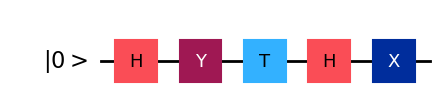

In [21]:
ket_0 = QuantumRegister(1, "|0>")

# Initialize circuit
circuit = QuantumCircuit(ket_0)

# Add gates to the circuit
circuit.h(0)
circuit.y(0)
circuit.t(0)
circuit.h(0)
circuit.x(0)

circuit.draw("mpl")

b) Plot the result on the Bloch sphere.<br>
Answer:

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

3D Coordinates:


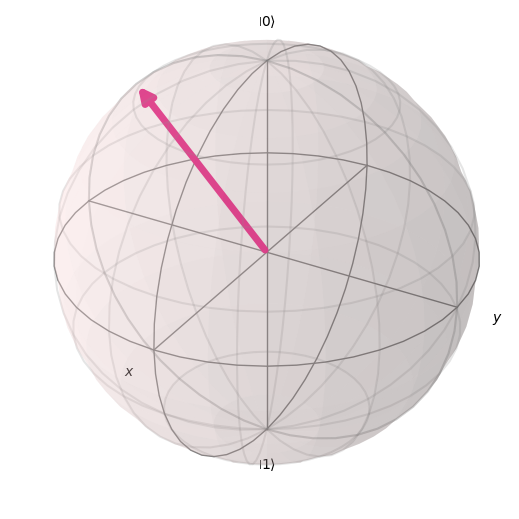

In [22]:
# Define state
ket_zero = Statevector([1,0])

# Define Gates
H = Operator([[1 / sp.sqrt(2), 1 / sp.sqrt(2)], [1 / sp.sqrt(2), -1 / sp.sqrt(2)]])
T = Operator([[1, 0], [0, (1 + sp.I) / sp.sqrt(2)]])
X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -sp.I], [sp.I, 0]])

# List the order of Gates
gates = [H,Y,T,H,X]

# Apply gates to q
q = ket_zero
for gate in gates:
    q = q.evolve(gate)
display(Latex("$HYTHX \\ket{0}$:"))
display(q.draw("latex"))

# Convert to polar form:
r_0 = np.abs(q[0])
phi_0 = np.angle(q[0])
r_1 = np.abs(q[1])
phi_1 = np.angle(q[1])

# Calculate the coordinates:
r = np.sqrt(r_0 ** 2 + r_1 ** 2)
theta = 2 * np.arccos(r_0 / r)
phi = phi_1 - phi_0

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

print("3D Coordinates:")
display(x,y,z)
plot_bloch_vector([x,y,z])

c) Calculate the probabilities for $\ket{0}$ and $\ket{1}$<br>
Answer:

In [23]:
alpha = q[0]
beta = q[1]
alpha_squared = q[0] * sp.conjugate(q[0])
beta_squared = q[1] * sp.conjugate(q[1])

display(Latex("Probability for $\\ket{0}$:"))
display(round(sp.expand(alpha_squared),2))
display(Latex("Probability for $\\ket{1}$:"))
display(round(sp.expand(beta_squared),2))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>